Epoch 0, Loss: 1.1284842491149902
Epoch 10, Loss: 0.9127213954925537
Epoch 20, Loss: 0.5485333204269409
Epoch 30, Loss: 0.3671317398548126
Epoch 40, Loss: 0.22609084844589233
Epoch 50, Loss: 0.11345937848091125
Epoch 60, Loss: 0.0656266063451767
Epoch 70, Loss: 0.04651673510670662
Epoch 80, Loss: 0.036748841404914856
Epoch 90, Loss: 0.030988017097115517


/tmp/ipython-input-4284032394.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  myor_df['species'] = myor_df['species'].replace({'setosa': 0,'versicolor': 1,'virginica': 2})


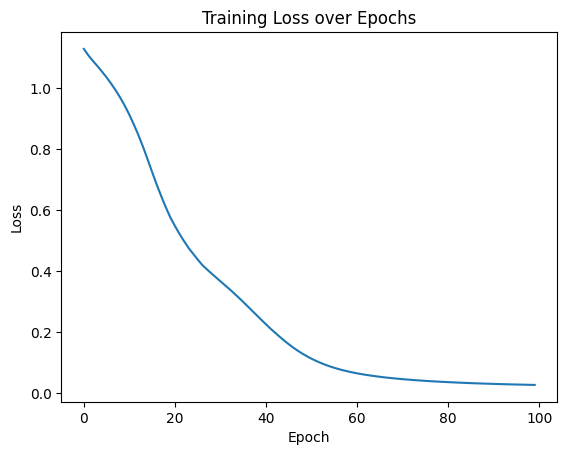

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

# Load the Iris dataset from a URL into a pandas DataFrame
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
myor_df = pd.read_csv(url)

# Replace string labels in the 'species' column with numeric labels
myor_df['species'] = myor_df['species'].replace({'setosa': 0,'versicolor': 1,'virginica': 2})

# Prepare features (X) and target (Y)
X = myor_df.drop('species', axis=1).values  # Convert to numpy array
y = myor_df['species'].values

# Split data into training and testing datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=41
)

# Convert numpy arrays to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

# Labels as LongTensor for classification
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Assuming the model was defined in the previous video, e.g.:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(4, 16)   # input 4 features to 16 neurons
        self.fc2 = nn.Linear(16, 16)  # hidden layer
        self.out = nn.Linear(16, 3)   # output 3 classes

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.out(x)
        return x

model = SimpleNN()

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
learning_rate = 0.01
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop parameters
epochs = 100
losses = []

for epoch in range(epochs):
    # Forward pass: compute predicted y by passing x to the model
    y_pred = model(X_train)

    # Compute and print loss
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()#updating the weight(step)

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

# Plot the loss over epochs to visualize training progress
plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()